In [1]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def add_gaussian_noise_to_image(image, mean=0, standard_deviation=1):
    def make_gaussian_dist(mean=0, standard_deviation=1):
        u1 = np.random.random()
        u2 = np.random.random()
        z = np.sqrt(-2.0 * np.log(u1)) * np.cos(2.0 * np.pi * u2)
        return z * standard_deviation + mean
    
    image = np.array(image)
    noise = np.vectorize(make_gaussian_dist)(
        np.full(image.shape, mean), np.full(image.shape, standard_deviation)
    )
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

In [3]:
def denoise_image(image, k):

    U, sigma, V = np.linalg.svd(image)
    sorted_singular_values = np.sort(sigma)[::-1]

    U = U[:, :k]
    sigma = sigma[:k]
    V = V[:k, :]
    denoised_image = np.dot(U, np.dot(np.diag(sigma), V))
    denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)
    return Image.fromarray(denoised_image), sorted_singular_values

In [4]:
def denoise_rgb_image(image, k):
        
    image = np.array(image).astype(np.float64)
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    r_denoised, r_sorted_singular_values = denoise_image(r, k)
    g_denoised, g_sorted_singular_values = denoise_image(g, k)
    b_denoised , b_sorted_singular_values= denoise_image(b, k)
    return Image.merge("RGB", (r_denoised, g_denoised, b_denoised)), \
            r_sorted_singular_values, g_sorted_singular_values, b_sorted_singular_values

In [8]:
image = Image.open('test.png')
noisy_image = add_gaussian_noise_to_image(image, mean=10, standard_deviation=30)

Text(0, 0.5, 'Singular Value')

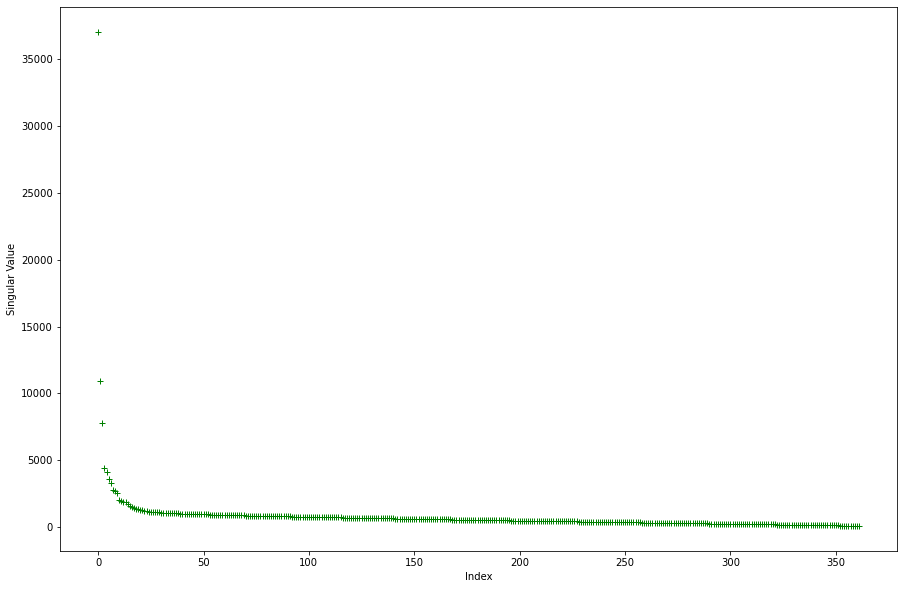

In [6]:
denoised_image, r_sorted_singular_values, g_sorted_singular_values, b_sorted_singular_values  = denoise_rgb_image(noisy_image, k = 10)
plt.figure(figsize=(15, 10))
# plt.plot(r_sorted_singular_values, 'r-')
plt.plot(g_sorted_singular_values, 'g+')
# plt.plot(b_sorted_singular_values, 'b^')
plt.xlabel('Index')
plt.ylabel('Singular Value')

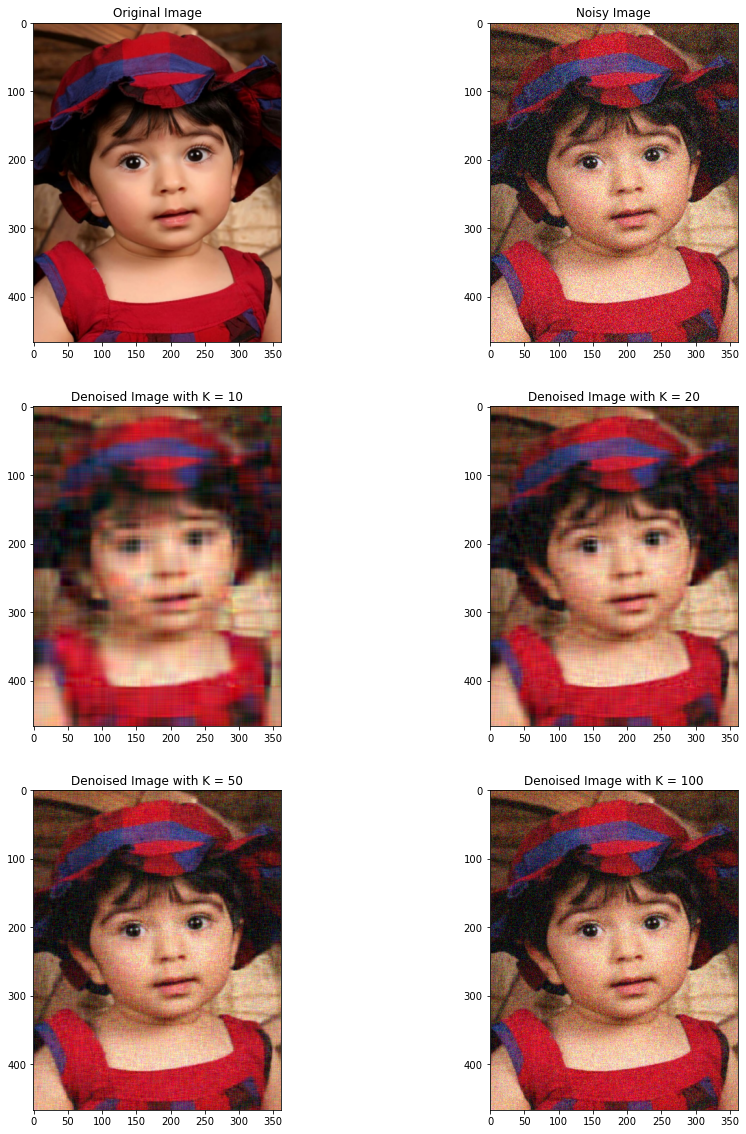

In [10]:
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(3, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image)
plt.subplot(3, 2, 3)
plt.title('Denoised Image with K = 10')
k10, r,g,b = denoise_rgb_image(noisy_image, k = 10)
plt.imshow(k10)
plt.subplot(3, 2, 4)
k20, r,g,b = denoise_rgb_image(noisy_image, k = 20)
plt.title('Denoised Image with K = 20')
plt.imshow(k20)
plt.subplot(3, 2, 5)
k50, r,g,b = denoise_rgb_image(noisy_image, k = 50)
plt.title('Denoised Image with K = 50')
plt.imshow(k50)
plt.subplot(3, 2, 6)
k100, r,g,b = denoise_rgb_image(noisy_image, k = 100)
plt.title('Denoised Image with K = 100')
plt.imshow(k100)